# Hipoteza III
Przychody firmy Meta rosną w tempie wykładniczym względem upływu lat.
\
Dane treningowe: roczne dane przychodów firmy meta z lat 2007-2017 \
Dane testowe: roczne dane przychodów firmy meta z lat 2018-2023 \
\
Wykorzystane modele:
- wykładniczy
- potęgowy
- wielomianowy

Zmienna objaśniana: przychody firmy Meta (Revenue) \
Zmienna objaśniająca: numer roku (NoY)

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

import importlib

from sklearn.metrics import mean_absolute_error

dane = importlib.import_module('Lab-1-Zadanie-1-Przygotowanie-danych')

## Model wykładniczy
Model wykładniczy służący jako punkt odwołania dla pozostałych modeli


Funkcja wykładnicza opisująca zjawisko \
$ W = b \cdot a^X $ \
, gdzie: \
$W$ -> 'Revenue' \
$X$ -> 'NoY'

Linearyzacja funkcji:

$ Y = log(W) $ \
$ a_0 = log(b)$ \
$ a_1 = log(a)$

$ Y = a_1 \cdot X + a_0 $


PODSUMOWANIE MODELU WYKŁADNICZNEGO (dla danych 2007-2017)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     245.7
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           7.69e-08
Time:                        16:18:37   Log-Likelihood:                -3.4619
No. Observations:                  11   AIC:                             10.92
Df Residuals:                       9   BIC:                             11.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

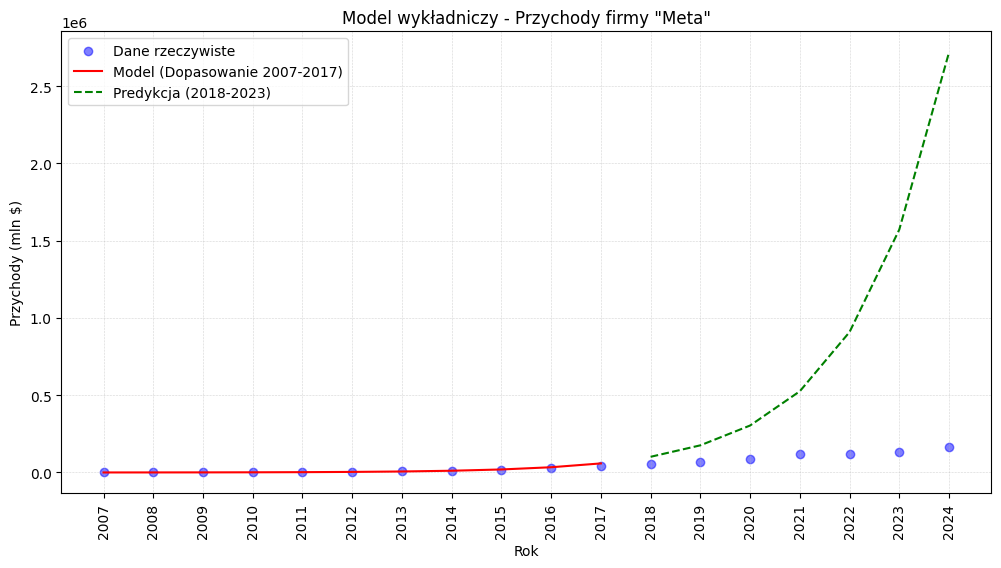

Średni błąd (MAE) dla lat 2018-2020: 122926.19 mln $
Średni błąd (MAE) dla lat 2021-2023: 1297570.89 mln $


In [2]:
data, data_train, data_test = dane.dane_przychody()

# Definicja modelu
X_train = data_train['NoY']
X_train = sm.add_constant(X_train)
Y_train = data_train['Revenue']

model_wykladniczy = sm.OLS(
    np.log(Y_train),
    X_train
).fit()

# Ocena modelu
print("PODSUMOWANIE MODELU WYKŁADNICZNEGO (dla danych 2007-2017)\n")
print(model_wykladniczy.summary())

X_pred = data_test['NoY']
X_pred = sm.add_constant(X_pred)
Y_pred_wykl = model_wykladniczy.predict(X_pred)

plt.figure(figsize=(12, 6))
plt.scatter(data['NoY'], data['Revenue'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoY'], np.exp(model_wykladniczy.fittedvalues), color='red', label='Model (Dopasowanie 2007-2017)')
plt.plot(data_test['NoY'], np.exp(Y_pred_wykl), color='green', linestyle='--', label='Predykcja (2018-2023)')

plt.title('Model wykładniczy - Przychody firmy "Meta"')
plt.xlabel('Rok')
plt.ylabel('Przychody (mln $)')
plt.xticks(range(min(data['NoY']), max(data['NoY']) + 1), labels=data['Year'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_wykladniczy_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['Year'] <= 2020]['Revenue'],
    np.exp(Y_pred_wykl[data_test['Year'] <= 2020])
)

model_wykladniczy_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['Year'] >= 2021]['Revenue'],
    np.exp(Y_pred_wykl[data_test['Year'] >= 2021])
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_wykladniczy_mae_2018_2020:.2f} mln $")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_wykladniczy_mae_2021_2023:.2f} mln $")



## Model potęgowy

Funkcja potęgowa opisująca zjawisko \
$ W = b \cdot X^a $ \
, gdzie: \
$W$ -> 'Revenue' \
$X$ -> 'NoY'

Linearyzacja funkcji:

$ Y = log(W) $ \
$ X_1 = log(X) $ \
$ a_0 = log(b)$ \
$ a_1 = log(a)$

$ Y = a_1 \cdot X_1 + a_0 $


PODSUMOWANIE MODELU POTEGOWEGO (dla danych 2007-2017)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     268.1
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           5.26e-08
Time:                        16:18:37   Log-Likelihood:                -2.9996
No. Observations:                  11   AIC:                             9.999
Df Residuals:                       9   BIC:                             10.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

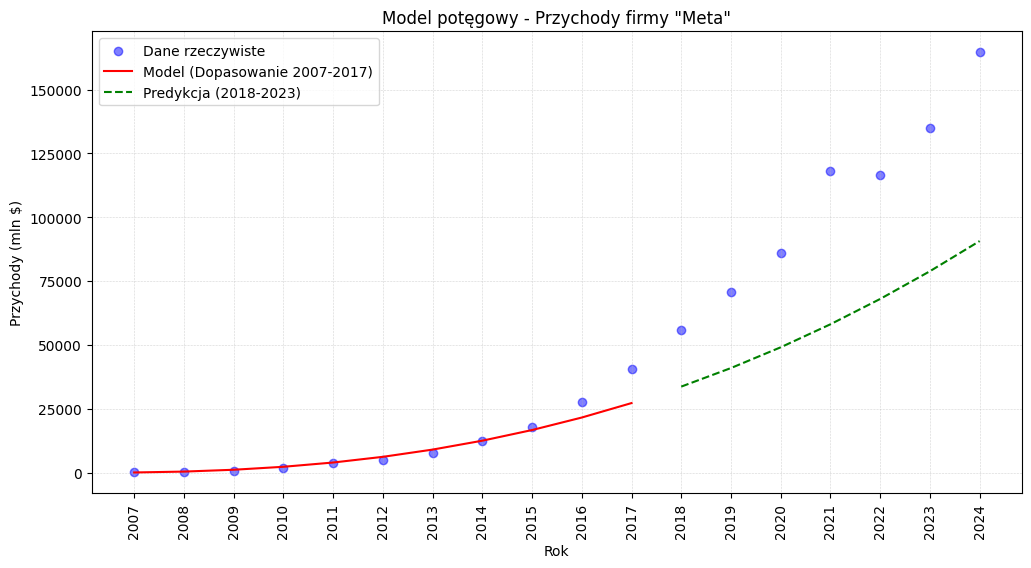

Średni błąd (MAE) dla lat 2018-2020: 29586.91 mln $
Średni błąd (MAE) dla lat 2021-2023: 59578.04 mln $


In [3]:
data, data_train, data_test = dane.dane_przychody()

# Definicja modelu
X_train = np.log(data_train['NoY'])
X_train = sm.add_constant(X_train)
Y_train = data_train['Revenue']

model_potegowy = sm.OLS(
    np.log(Y_train),
    X_train
).fit()

# Ocena modelu
print("PODSUMOWANIE MODELU POTEGOWEGO (dla danych 2007-2017)\n")
print(model_potegowy.summary())

X_pred = np.log(data_test['NoY'])
X_pred = sm.add_constant(X_pred)
Y_pred_pot = model_potegowy.predict(X_pred)

plt.figure(figsize=(12, 6))
plt.scatter(data['NoY'], data['Revenue'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoY'], np.exp(model_potegowy.fittedvalues), color='red', label='Model (Dopasowanie 2007-2017)')
plt.plot(data_test['NoY'], np.exp(Y_pred_pot), color='green', linestyle='--', label='Predykcja (2018-2023)')

plt.title('Model potęgowy - Przychody firmy "Meta"')
plt.xlabel('Rok')
plt.ylabel('Przychody (mln $)')
plt.xticks(range(min(data['NoY']), max(data['NoY']) + 1), labels=data['Year'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_potegowy_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['Year'] <= 2020]['Revenue'],
    np.exp(Y_pred_pot[data_test['Year'] <= 2020])
)

model_potegowy_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['Year'] >= 2021]['Revenue'],
    np.exp(Y_pred_pot[data_test['Year'] >= 2021])
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_potegowy_mae_2018_2020:.2f} mln $")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_potegowy_mae_2021_2023:.2f} mln $")



## Model hybrydowy

Na podstawie wyników modelu wykładniczego i potęgowego, zauważono zależność:
- model wykładniczy 'przeszacowuje' przychody w latach 2018-2023
- model potęgowy 'nie doszacowuje' przychody w latach 2018-2023

Model dobrze opisujący przychody w latach 2018-2023 znajduje się zatem pomiędzy testowanymi modelami, a opisuje go średnia ważona obu modeli: \
$Y_{hybryda} = \alpha \cdot Y_{potęgowy} + (1 - \alpha) \cdot Y_{wykładniczy}$

Zadaniem stało się znalezienie najlepszej wartości $\alpha$. Parametr można wyznaczyć poprzez rozwiązanie zadania optymalizacyjnego, którego celem jest minimalizacja funkcji MAE. Funkcją MAE może być MAE wyników predykcji dla lat 2018-2020 lub 2021-2023, albo wyniki predykcji dla lat 2018-2023.

Po eksperymentach wybrano funkcję MAE wyników predykcji dla lat 2018-2023, ponieważ zwraca najlepsze wyniki.

Wyznaczona wartość alfa: 0.18
Wynik R^2 dla modelu hybrydowego: 0.938


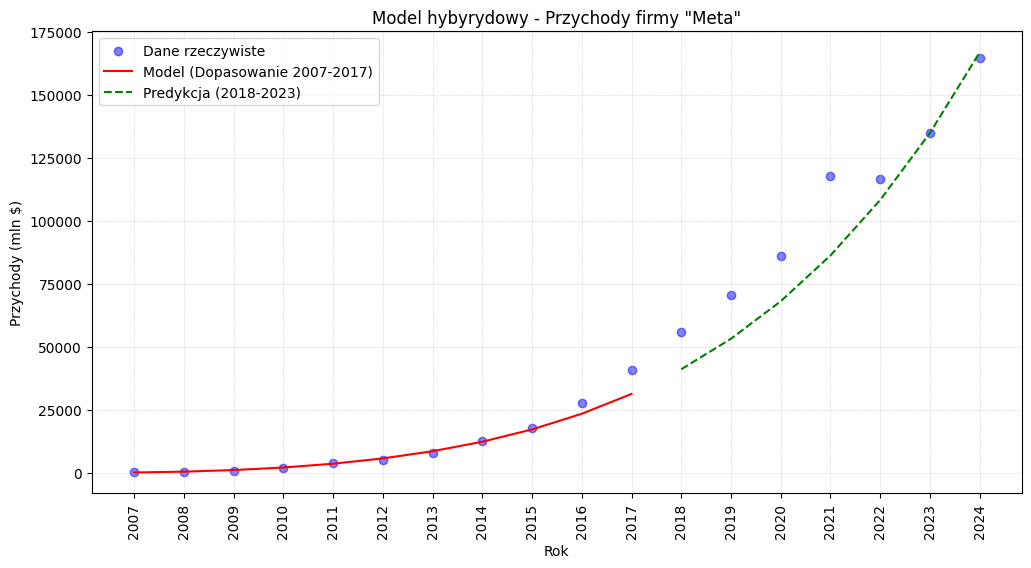

Średni błąd (MAE) dla lat 2018-2020: 16717.30 mln $
Średni błąd (MAE) dla lat 2021-2023: 10598.06 mln $


In [4]:

from scipy.optimize import minimize_scalar
from sklearn.metrics import r2_score

y_wykl = model_wykladniczy.fittedvalues
y_pot = model_potegowy.fittedvalues


def function(alfa):
    y = alfa * y_wykl + (1 - alfa) * y_pot
    pred = alfa * Y_pred_wykl + (1 - alfa) * Y_pred_pot

    mae_train = mean_absolute_error(
        data_train['Revenue'],
        y
    )

    mae_2018_2020 = mean_absolute_error(
        data_test[data_test['Year'] <= 2020]['Revenue'],
        np.exp(pred[data_test['Year'] <= 2020])
    )

    mae_2021_2023 = mean_absolute_error(
        data_test[data_test['Year'] >= 2021]['Revenue'],
        np.exp(pred[data_test['Year'] >= 2021])
    )

    mae_2018_2023 = mean_absolute_error(
        data_test['Revenue'],
        np.exp(pred)
    )

    # zwracana wartość decyduje co wpływa na wartość alfa
    return mae_2018_2023


alfa = minimize_scalar(function, bounds=(0, 1)).x
print(f"Wyznaczona wartość alfa: {alfa:.2f}")
y_hybr = alfa * y_wykl + (1 - alfa) * y_pot
Y_pred_hyb = alfa * Y_pred_wykl + (1 - alfa) * Y_pred_pot

r2_hyb = r2_score(data_train['Revenue'], np.exp(y_hybr))
print(f"Wynik R^2 dla modelu hybrydowego: {r2_hyb:.3f}")

plt.figure(figsize=(12, 6))
plt.scatter(data['NoY'], data['Revenue'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoY'], np.exp(y_hybr), color='red', label='Model (Dopasowanie 2007-2017)')
plt.plot(data_test['NoY'], np.exp(Y_pred_hyb), color='green', linestyle='--', label='Predykcja (2018-2023)')

plt.title('Model hybyrydowy - Przychody firmy "Meta"')
plt.xlabel('Rok')
plt.ylabel('Przychody (mln $)')
plt.xticks(range(min(data['NoY']), max(data['NoY']) + 1), labels=data['Year'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_hybrydowy_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['Year'] <= 2020]['Revenue'],
    np.exp(Y_pred_hyb[data_test['Year'] <= 2020])
)

model_hybrydowy_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['Year'] >= 2021]['Revenue'],
    np.exp(Y_pred_hyb[data_test['Year'] >= 2021])
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_hybrydowy_mae_2018_2020:.2f} mln $")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_hybrydowy_mae_2021_2023:.2f} mln $")


## Model wielomianowy


PODSUMOWANIE MODELU WIELOMIANOWEGO (dla danych 2007-2017)

                                 OLS Regression Results                                
Dep. Variable:                Revenue   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1142.
Date:                Tue, 20 Jan 2026   Prob (F-statistic):                    1.49e-11
Time:                        16:18:38   Log-Likelihood:                         -91.966
No. Observations:                  11   AIC:                                      187.9
Df Residuals:                       9   BIC:                                      188.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [

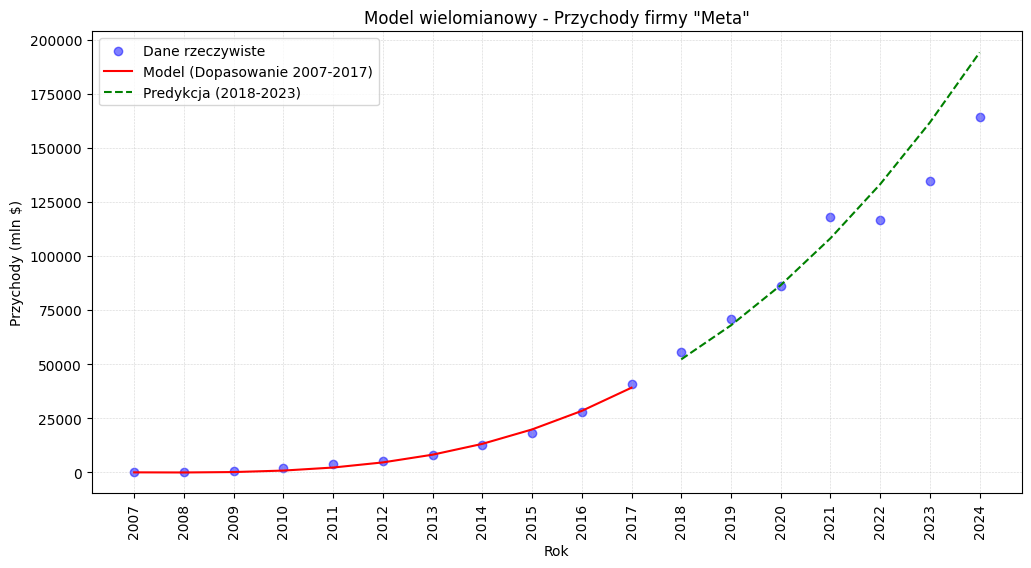

Średni błąd (MAE) dla lat 2018-2020: 2315.35 mln $
Średni błąd (MAE) dla lat 2021-2023: 20752.57 mln $


In [5]:
import pandas as pd

data, data_train, data_test = dane.dane_przychody()


# Definicja modelu
X_train = pd.DataFrame()
#X_train['X1'] = data_train['NoY']
X_train['X2'] = data_train['NoY'] ** 2
X_train['X3'] = data_train['NoY'] ** 3
#X_train['X4'] = data_train['NoY'] ** 4
#X_train = sm.add_constant(X_train)
Y_train = data_train['Revenue']

model_wielomianowy = sm.OLS(
    Y_train,
    X_train
).fit()

# Ocena modelu
print("PODSUMOWANIE MODELU WIELOMIANOWEGO (dla danych 2007-2017)\n")
print(model_wielomianowy.summary())

X_pred = pd.DataFrame()
#X_pred['X1'] = data_test['NoY']
X_pred['X2'] = data_test['NoY'] ** 2
X_pred['X3'] = data_test['NoY'] ** 3
#X_pred['X4'] = data_test['NoY'] ** 4
#X_pred = sm.add_constant(X_pred)
Y_pred_wiel = model_wielomianowy.predict(X_pred)

plt.figure(figsize=(12, 6))
plt.scatter(data['NoY'], data['Revenue'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoY'], model_wielomianowy.fittedvalues, color='red', label='Model (Dopasowanie 2007-2017)')
plt.plot(data_test['NoY'], Y_pred_wiel, color='green', linestyle='--', label='Predykcja (2018-2023)')

plt.title('Model wielomianowy - Przychody firmy "Meta"')
plt.xlabel('Rok')
plt.ylabel('Przychody (mln $)')
plt.xticks(range(min(data['NoY']), max(data['NoY']) + 1), labels=data['Year'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_wielomianowy_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['Year'] <= 2020]['Revenue'],
    Y_pred_wiel[data_test['Year'] <= 2020]
)

model_wielomianowy_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['Year'] >= 2021]['Revenue'],
    Y_pred_wiel[data_test['Year'] >= 2021]
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_wielomianowy_mae_2018_2020:.2f} mln $")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_wielomianowy_mae_2021_2023:.2f} mln $")



## Model logistyczny

Funkcja logistyczna opisująca zjawisko \
$$
 W = \frac{k}{1 + b \cdot e^{-a \cdot X}}
$$
,gdzie \
$W$ -> 'Revenue' \
$X$ -> 'NoY' \
$k$ -> górna asymptota funkcji - wartość nasycenia rynku

Linearyzacja funkcji: \
$Y = ln(\frac{k-W}{W})$ \
$a_0 = ln(b)$ \
$a_1 = -a$

Równoważny model liniowy:
$Y = a_1 \cdot X + a_0$



Wyznaczona wartość k: 140249.80
PODSUMOWANIE MODELU LOGISTYCZNEGO (dla danych 2009-2017)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     340.3
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           1.85e-08
Time:                        16:18:39   Log-Likelihood:                -2.2341
No. Observations:                  11   AIC:                             8.468
Df Residuals:                       9   BIC:                             9.264
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

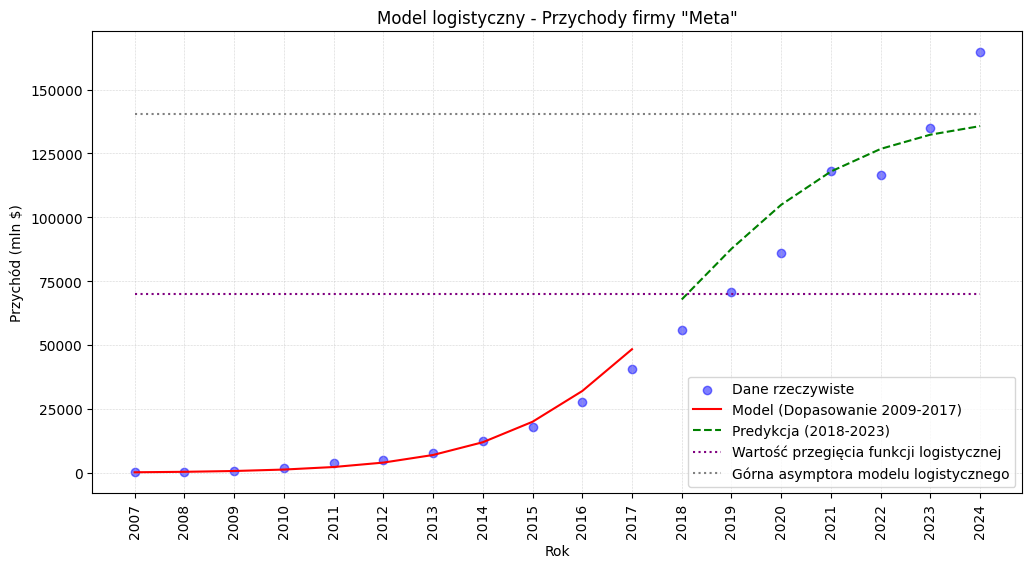

Średni błąd (MAE) dla lat 2018-2020: 15983.05 mln $
Średni błąd (MAE) dla lat 2021-2023: 10381.74 mln $


In [6]:
from scipy.optimize import minimize_scalar

data, data_train, data_test = dane.dane_przychody()

# Definicja modelu
X_train = data_train['NoY']
X_train = sm.add_constant(X_train)
Y_train = data_train['Revenue']


def function(k):
    Y = lambda W: np.log((k - W) / W)
    W = lambda Y: k / (np.exp(Y) + 1)
    model_logistyczny = sm.OLS(
        Y(Y_train),
        X_train
    ).fit()
    X_pred = data_test['NoY']
    X_pred = sm.add_constant(X_pred)
    Y_pred_log = model_logistyczny.predict(X_pred)

    mae_train = mean_absolute_error(
        data_train['Revenue'],
        W(model_logistyczny.fittedvalues)
    )

    mae_2018_2023 = mean_absolute_error(
        data_test['Revenue'],
        W(Y_pred_log)
    )

    return mae_2018_2023 + mae_train


k = minimize_scalar(function, bounds=(140000, 600000)).x
print(f"Wyznaczona wartość k: {k:.2f}")
Y = lambda W: np.log((k - W) / W)
W = lambda Y: k / (np.exp(Y) + 1)

model_logistyczny = sm.OLS(
    Y(Y_train),
    X_train
).fit()

# Ocena modelu
print("PODSUMOWANIE MODELU LOGISTYCZNEGO (dla danych 2009-2017)\n")
print(model_logistyczny.summary())

X_pred = data_test['NoY']
X_pred = sm.add_constant(X_pred)
Y_pred_log = model_logistyczny.predict(X_pred)

plt.figure(figsize=(12, 6))
plt.scatter(data['NoY'], data['Revenue'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoY'], W(model_logistyczny.fittedvalues), color='red', label='Model (Dopasowanie 2009-2017)')
plt.plot(data_test['NoY'], W(Y_pred_log), color='green', linestyle='--', label='Predykcja (2018-2023)')
plt.plot(data['NoY'], [k / 2 for x in data['NoY']], color='purple', linestyle=':',
         label='Wartość przegięcia funkcji logistycznej')
plt.plot(data['NoY'], [k for x in data['NoY']], color='grey', linestyle=':',
         label='Górna asymptora modelu logistycznego')

plt.title('Model logistyczny - Przychody firmy "Meta"')
plt.xlabel('Rok')
plt.ylabel('Przychód (mln $)')
plt.xticks(range(min(data['NoY']), max(data['NoY']) + 1), labels=data['Year'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_logistyczny_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['Year'] <= 2020]['Revenue'],
    W(Y_pred_log[data_test['Year'] <= 2020])
)

model_logistyczny_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['Year'] >= 2021]['Revenue'],
    W(Y_pred_log[data_test['Year'] >= 2021])
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_logistyczny_mae_2018_2020:.2f} mln $")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_logistyczny_mae_2021_2023:.2f} mln $")

